In [15]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

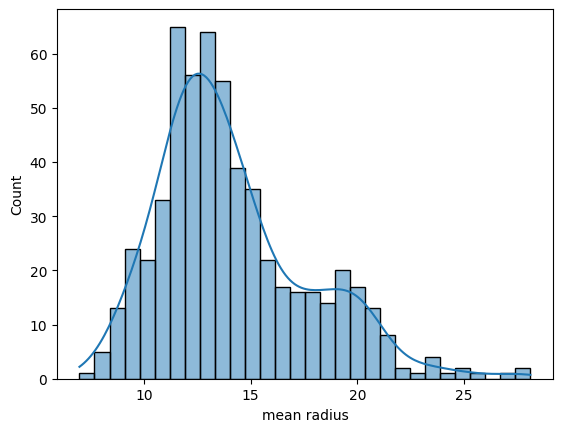

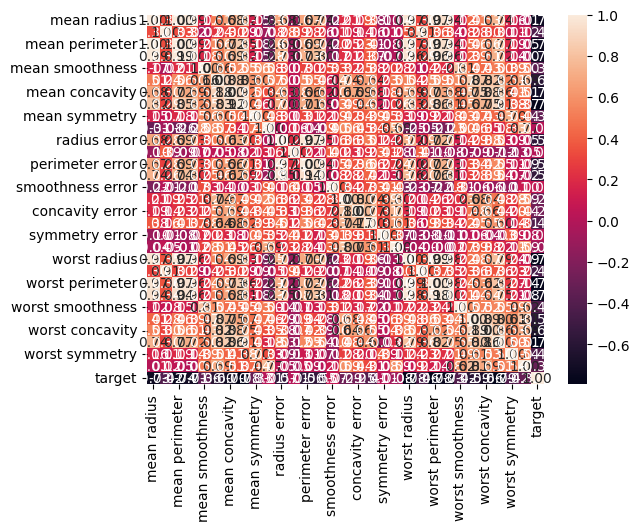

In [33]:
# Load data
data = load_breast_cancer()
X, y = data.data, data.target

from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset
data = load_breast_cancer()

# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Dataset overview
#print(df.head())  # Preview first few rows
#print(df.info())  # Data types and non-null counts
print(df.describe())  # Summary statistics
print(data.DESCR)  # Dataset description

#Class Distribution
df['target'].value_counts()


#Feature Distributuion
sns.histplot(df['mean radius'], bins=30, kde=True)  # Example feature
plt.show()


#Correlation Analysis
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.show()



In [27]:

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Build the model
import tensorflow as tf

# Define the model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(X.shape[1],)),  # Explicitly define the input shape
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6047 - loss: 0.6701 - val_accuracy: 0.8947 - val_loss: 0.4671
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8914 - loss: 0.4501 - val_accuracy: 0.9474 - val_loss: 0.3221
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9062 - loss: 0.3479 - val_accuracy: 0.9561 - val_loss: 0.2365
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9423 - loss: 0.2684 - val_accuracy: 0.9561 - val_loss: 0.1847
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9510 - loss: 0.2424 - val_accuracy: 0.9561 - val_loss: 0.1481
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9507 - loss: 0.1932 - val_accuracy: 0.9561 - val_loss: 0.1234
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9553 - loss: 0.1771 - val_accuracy: 0.9649 - val_loss: 0.1059
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9661 - loss: 0.1559 - val_accuracy: 0.9737 - val_loss

In [22]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Predict the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Display classification report
report = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])
print("Classification Report:\n", report)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Confusion Matrix:
 [[42  1]
 [ 2 69]]
Classification Report:
               precision    recall  f1-score   support

      Benign       0.95      0.98      0.97        43
   Malignant       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


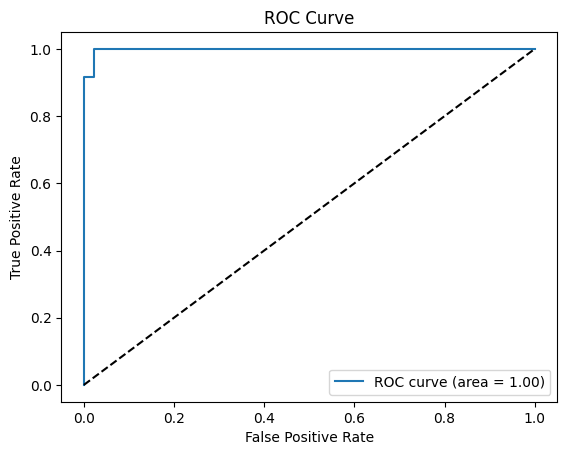

In [23]:
#ROC Curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
y_probs = model.predict(X_test).ravel()

# Compute ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


In [ ]:
pip install scikeras
from scikeras.wrappers import KerasClassifier
print("Scikeras installed successfully!")


In [29]:
#Hyperparameter

from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
import tensorflow as tf

# def create_model(optimizer='adam'):
#     model = tf.keras.Sequential([
#         tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
#         tf.keras.layers.Dropout(0.2),
#         tf.keras.layers.Dense(16, activation='relu'),
#         tf.keras.layers.Dense(1, activation='sigmoid')
#     ])
#     model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
#     return model

def create_model(optimizer='adam'):
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(X_train.shape[1],)),  # Explicitly define the input shape
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


# Wrap the Keras model
model = KerasClassifier(model=create_model, verbose=0)

# Define grid search parameters
param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [10, 20],
    'model__optimizer': ['adam', 'rmsprop']  # 'model__' prefix required for hyperparameters
}

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

print("Best Parameters:", grid_result.best_params_)


Best Parameters: {'batch_size': 16, 'epochs': 20, 'model__optimizer': 'rmsprop'}


Experiment with:

Number of Layers/Neurons: Add or remove layers to optimize performance.

Activation Functions: Test different functions (e.g., tanh, elu) for hidden layers.

Learning Rate: Adjust the optimizer’s learning rate.

Regularization: Apply L1/L2 regularization or dropout layers to prevent overfitting.

In [30]:
best_model = create_model(optimizer='rmsprop')
history = best_model.fit(X_train, y_train, batch_size=64, epochs=20, validation_split=0.2)


Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.5820 - loss: 0.6831 - val_accuracy: 0.9011 - val_loss: 0.5413
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8763 - loss: 0.5124 - val_accuracy: 0.9231 - val_loss: 0.4500
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8912 - loss: 0.4478 - val_accuracy: 0.9231 - val_loss: 0.3876
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9070 - loss: 0.3791 - val_accuracy: 0.9231 - val_loss: 0.3358
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9229 - loss: 0.3500 - val_accuracy: 0.9231 - val_loss: 0.2941
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9224 - loss: 0.2975 - val_accuracy: 0.9341 - val_loss: 0.2608
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9519 - loss: 0.2577 - val_accuracy: 0.9451 - val_loss: 0.2328
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9529 - loss: 0.2213 - val_accuracy: 0.9451 - val_loss: 0.2088


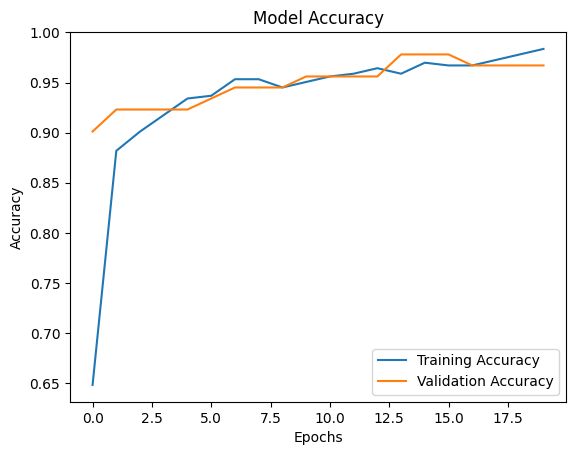

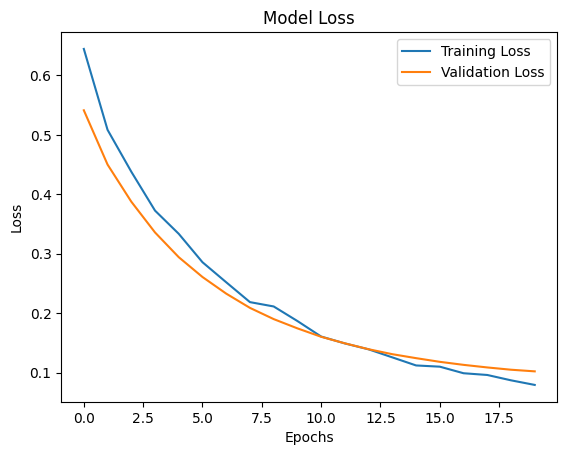

In [31]:

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
